<h1><center>Tennis series</h1></center>

In [1]:
from __future__ import print_function

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy import stats
from sklearn.model_selection import train_test_split

import tensorflow as tf


import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams['figure.figsize'] = (16, 6)
pd.options.display.max_colwidth = 30
pd.options.display.max_columns = 100

from IPython.display import Image
from IPython.core.display import HTML 

Importiamo i dati della serie da un CSV

In [2]:
#%%writefile data_loader.py
from sklearn import preprocessing

class CSVLoader(object):

    def __init__(self, file, train_test_split=0.8):
        
        self.train_test_split = train_test_split
        
        # import data
        #self.df = pd.read_csv(file, parse_dates=True, index_col='id')
        self.df = pd.read_csv(file, parse_dates=True)

        #print('float features', self.float_features.shape)
        #print('int features', self.int_features.shape)
        #print('targets', self.targets.shape)
    
    
    @property
    def data_size(self):
        return len(self.df)

    @property
    def num_names(self):
        return len(self.encoder.classes_)
    

            
CSVLoader('2Rotation_B.out').df.head()

,tick,q1,q2,q3,q4,yaw,pitch,roll,axR,ayR,azR,axW,ayW,azW,temp,Head1,Head2
0,29608,1.0,-0.0,-0.0,-0.01,1.71,0.11,-0.03,3,1,19,2,0,19,34,2,134
1,29618,1.0,-0.0,-0.0,-0.01,1.71,0.11,-0.03,8,1,17,7,0,17,34,2,134
2,29628,1.0,-0.0,-0.0,-0.01,1.71,0.11,-0.03,8,0,9,7,0,9,34,2,134
3,29638,1.0,-0.0,-0.0,-0.01,1.71,0.11,-0.03,5,3,3,5,2,3,34,2,134
4,29648,1.0,-0.0,-0.0,-0.01,1.71,0.11,-0.03,7,9,-2,7,8,-1,34,2,135


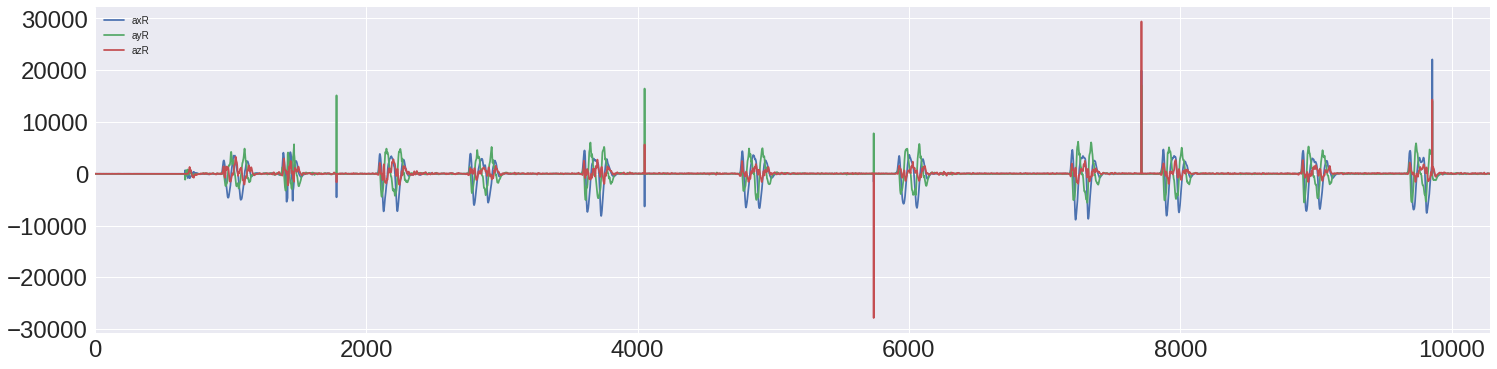

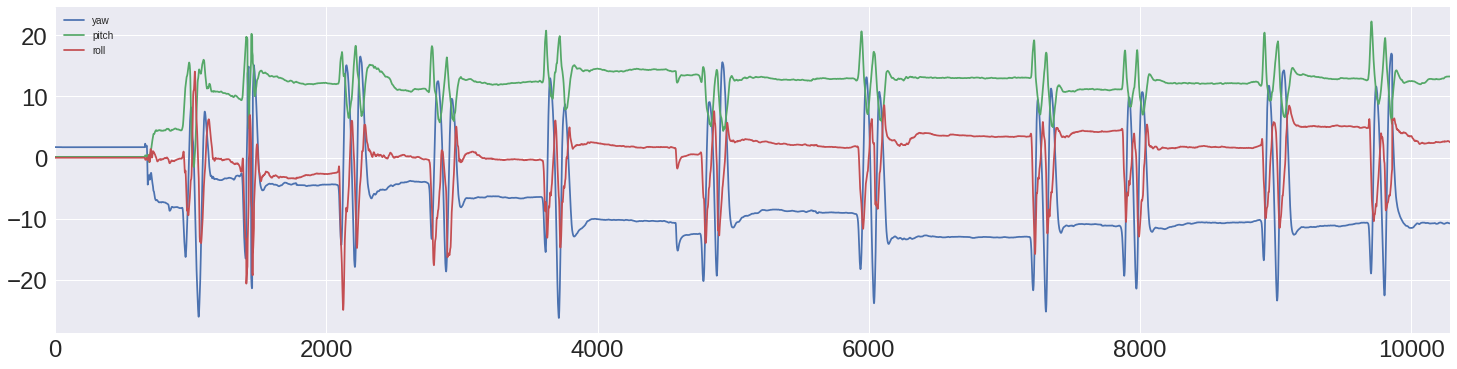

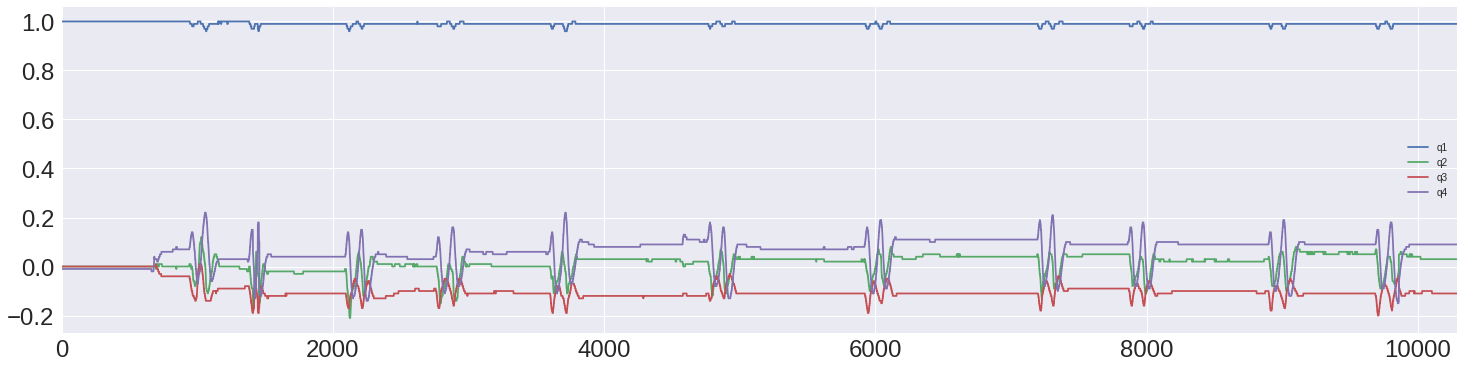

In [3]:
loader = CSVLoader('2Rotation_B.out').df
loader[['axR','ayR','azR']].plot(figsize=(25, 6),fontsize=24)
loader[['yaw','pitch','roll']].plot(figsize=(25, 6),fontsize=24)
loader[['q1','q2','q3','q4']].plot(figsize=(25, 6),fontsize=24)

#loader.plot(figsize=(16, 12))

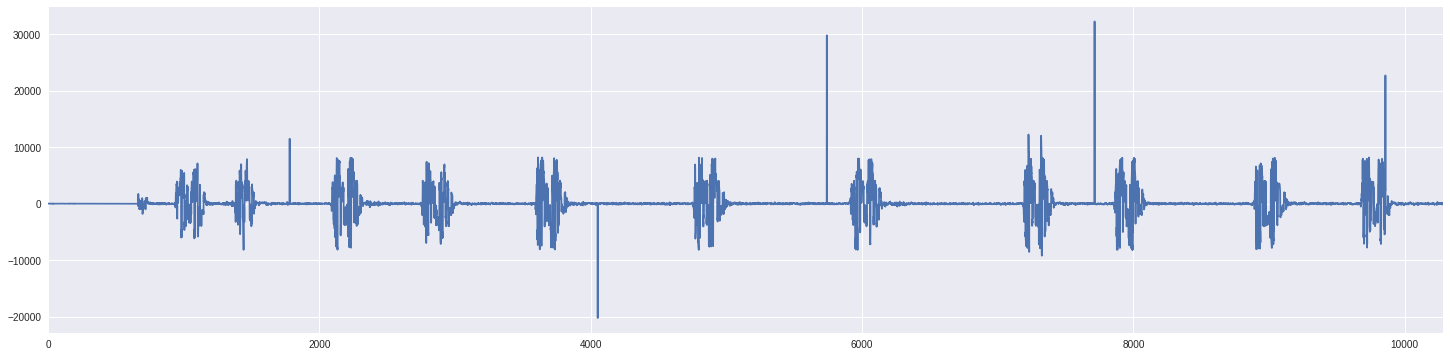

In [4]:
acc = loader[['axR','ayR','azR']]
acc['sum'] = acc['axR']^2 + acc['ayR']^2 + acc['azR']^2
acc['sum'].plot(figsize=(25, 6))
